## Random forest credit default prediction
In this case study we will build a random forest to predict whether a given customer defaults or not. We will start the process with data cleaning and prepration and then tune the model to find optimal hyperparameters.

### Data understanding and cleaning

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
os.chdir('C:/Users/annup/Desktop/Edwisor')
os.getcwd()

'C:\\Users\\annup\\Desktop\\Edwisor'

In [3]:
# Load the dataset in df object
df_credit = pd.read_csv('creditcard.csv')
df_credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# Understand the type of column
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
defaulted    30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In this case, we know that there are no major data quality issues, so we'll go ahead and build the model.

### data preparation and model building

In [5]:
# Import test_train_split 
from sklearn.model_selection import train_test_split

In [6]:
# putting feature variable to X
X = df_credit.drop('defaulted',axis=1)
# putting target variable to y
y = df_credit['defaulted']
# splitting the data into train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 101)

### Default Hyperparameters
Lets first fit a random forest with default parameters

In [7]:
# Importing random forest from sklearn
from sklearn.ensemble import RandomForestClassifier
# store the classifier in rfc object
rfc = RandomForestClassifier()

In [8]:
# fit the model with train data
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [9]:
# Making predictions
rfc_predic = rfc.predict(X_test)

In [10]:
# Importing classification report and confusion matrix
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [11]:
# Lets check the report of our model
print(classification_report(y_test,rfc_predic))

              precision    recall  f1-score   support

           0       0.83      0.94      0.89      7058
           1       0.61      0.32      0.42      1942

    accuracy                           0.81      9000
   macro avg       0.72      0.63      0.65      9000
weighted avg       0.78      0.81      0.78      9000



In [12]:
# print confusion matrix
print(confusion_matrix(y_test,rfc_predic))

[[6657  401]
 [1326  616]]


In [13]:
print(accuracy_score(y_test,rfc_predic))

0.8081111111111111


So far so good, let's now look at the list of hyperparameters which we can tune to improve model performance.

### Hyperparameter Tuning

#### Tuning Max_depth

In [14]:
#Let's try to find the optimum values for max_depth and understand how the value of max_depth impacts the overall accuracy of the ensemble.
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [15]:
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}
# Instantiate the model
rf = RandomForestClassifier()
# Fit tree on training data
rf = GridSearchCV(rf,parameters,cv=5,scoring='accuracy',return_train_score=True)
rf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [16]:
# Scores of gridserchcv
scores = rf.cv_results_
scores_df = pd.DataFrame(scores).head()

In [17]:
scores_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.126166,0.010301,0.007206,0.000397,2,{'max_depth': 2},0.807189,0.799524,0.798571,0.801190,...,0.801762,0.003010,4,0.803441,0.797440,0.795833,0.807440,0.801798,0.801190,0.004177
1,0.281142,0.005630,0.009596,0.000489,7,{'max_depth': 7},0.814330,0.814286,0.813333,0.806667,...,0.812095,0.002858,1,0.831121,0.829583,0.825238,0.829048,0.830486,0.829095,0.002057
2,0.424498,0.007726,0.012597,0.000490,12,{'max_depth': 12},0.808379,0.810952,0.812857,0.803810,...,0.809238,0.003071,2,0.880826,0.878988,0.878274,0.881369,0.874948,0.878881,0.002273
3,0.525296,0.005466,0.014601,0.000487,17,{'max_depth': 17},0.802904,0.810000,0.810238,0.800476,...,0.805095,0.004174,3,0.925710,0.923571,0.925595,0.930893,0.927861,0.926726,0.002487


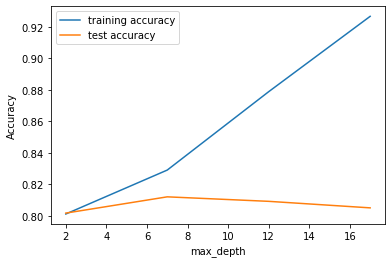

In [18]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores_df["param_max_depth"], 
         scores_df["mean_train_score"], 
         label="training accuracy")
plt.plot(scores_df["param_max_depth"], 
         scores_df["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

You can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. The ensemble tries to overfit as we increase the max_depth.

Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.

#### Tuning n_estimators

In [19]:
# Parameters to build 
parameters = {'n_estimators':range(100,1500,400)}
# Instantiate the model
rf = RandomForestClassifier(max_depth=4) # we r specifing a max_depth
# fit training data
rf = GridSearchCV(rf,parameters,cv=5,scoring='accuracy',return_train_score=True)
rf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [20]:
# scores of grid_searchcv
scores = rf.cv_results_
scores_df = pd.DataFrame(scores)

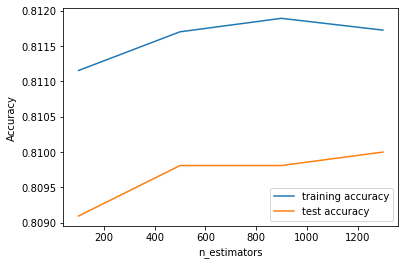

In [21]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores_df["param_n_estimators"], 
         scores_df["mean_train_score"], 
         label="training accuracy")
plt.plot(scores_df["param_n_estimators"], 
         scores_df["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Tuning max_features

In [22]:
# Parameters to build model on
parameters = {'max_features':[4,8,14,20,24]}
# Instantiate the model
rf = RandomForestClassifier(max_depth=4)
#fit the training data
rf = GridSearchCV(rf,parameters,cv=5,scoring='accuracy',return_train_score=True)
rf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [23]:
# Scores of GridSearchCV
scores = rf.cv_results_
scores_df = pd.DataFrame(scores)

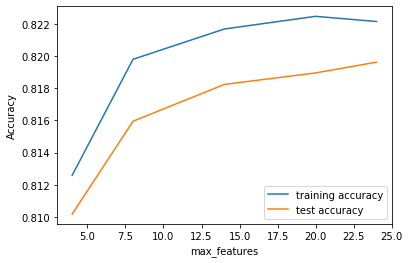

In [24]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores_df["param_max_features"], 
         scores_df["mean_train_score"], 
         label="training accuracy")
plt.plot(scores_df["param_max_features"], 
         scores_df["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Apparently, the training and test scores both seem to increase as we increase max_features, and the model doesn't seem to overfit more with increasing max_features. Think about why that might be the case.

## Grid Search to find optimum parameters

In [25]:
# Create parameters grid based on the results of random search
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [26]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 14.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [27]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8188095238095238 using {'max_depth': 8, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


## Fitting the final model with the best parameters obtained from grid search

In [28]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [29]:
# Fit the train data
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
# Predict
rfc_predict = rfc.predict(X_test)

In [31]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
print(classification_report(y_test,rfc_predict))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7058
           1       0.69      0.36      0.47      1942

    accuracy                           0.83      9000
   macro avg       0.77      0.66      0.68      9000
weighted avg       0.81      0.83      0.80      9000



In [33]:
print(confusion_matrix(y_test,rfc_predict))

[[6748  310]
 [1251  691]]


In [35]:
cm = pd.crosstab(y_test,rfc_predict)
# Now calculate error metrics
TN = cm.iloc[0,0]
FP = cm.iloc[0,1]
FN = cm.iloc[1,0]
TP = cm.iloc[1,1]

In [36]:
cm

col_0,0,1
defaulted,,
0,6748,310
1,1251,691


In [37]:
# False negative rate
FNR = (FN*100)/(FN+TP)
FNR

64.41812564366633

In [38]:
# Print accuracy
print(accuracy_score(y_test,rfc_predict))

0.8265555555555556


In [41]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

So we can see that our accuracy is increased